In [46]:
#pip install xgboost

In [47]:
# Importing related libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import tensorflow as tf
import keras
import autokeras as ak
import random
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math
from xgboost import XGBClassifier
from xgboost import XGBRegressor

In [48]:
# Set seed to make sure the code to be reproducible
random.seed(123)
np.random.seed(123)
tf.random.set_seed(123)

In [49]:
# Import the dataset
filename = 'norwegian_dataset.csv'
training_data = pd.read_csv(filename, index_col = False)
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6.0,0.391600,0.709900,2.480200,0.665700,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6.0,0.391100,0.721212,2.502200,0.669454,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6.0,0.407800,0.728698,2.473100,0.702844,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6.0,0.407700,0.727200,2.481300,0.730400,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6.0,0.426000,0.704400,2.470900,0.677300,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1.0,0.166493,0.830020,2.334237,0.788812,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1.0,0.176284,0.858255,2.365948,0.819950,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1.0,0.183089,0.901830,2.379198,0.866326,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1.0,0.175724,0.919743,2.360352,0.888828,7/1-2 S,3160.062500


In [50]:
training_data['LITHOLOGY_GEOLINK'].unique()

array([ 6.,  7.,  5., 19., 16.,  4.,  2.,  1., 11., 12., 13., 18.,  3.,
       10.,  9., 15., 17., 22.])

In [51]:
df = training_data
df.loc[df["LITHOLOGY_GEOLINK"] == 9, "LITHOLOGY_GEOLINK"]  = 8
df.loc[df["LITHOLOGY_GEOLINK"] == 10, "LITHOLOGY_GEOLINK"] = 9
df.loc[df["LITHOLOGY_GEOLINK"] == 11, "LITHOLOGY_GEOLINK"]  = 10
df.loc[df["LITHOLOGY_GEOLINK"] == 12, "LITHOLOGY_GEOLINK"] = 11
df.loc[df["LITHOLOGY_GEOLINK"] == 13, "LITHOLOGY_GEOLINK"] = 12
df.loc[df["LITHOLOGY_GEOLINK"] == 15, "LITHOLOGY_GEOLINK"] = 13
df.loc[df["LITHOLOGY_GEOLINK"] == 16, "LITHOLOGY_GEOLINK"] = 14
df.loc[df["LITHOLOGY_GEOLINK"] == 17, "LITHOLOGY_GEOLINK"] = 15
df.loc[df["LITHOLOGY_GEOLINK"] == 18, "LITHOLOGY_GEOLINK"] = 16
df.loc[df["LITHOLOGY_GEOLINK"] == 19, "LITHOLOGY_GEOLINK"] = 17
df.loc[df["LITHOLOGY_GEOLINK"] == 22, "LITHOLOGY_GEOLINK"] = 18
training_data = df
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6.0,0.391600,0.709900,2.480200,0.665700,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6.0,0.391100,0.721212,2.502200,0.669454,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6.0,0.407800,0.728698,2.473100,0.702844,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6.0,0.407700,0.727200,2.481300,0.730400,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6.0,0.426000,0.704400,2.470900,0.677300,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1.0,0.166493,0.830020,2.334237,0.788812,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1.0,0.176284,0.858255,2.365948,0.819950,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1.0,0.183089,0.901830,2.379198,0.866326,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1.0,0.175724,0.919743,2.360352,0.888828,7/1-2 S,3160.062500


In [52]:
training_data['LITHOLOGY_GEOLINK'].unique()

array([ 6.,  7.,  5., 17., 14.,  4.,  2.,  1., 10., 11., 12., 16.,  3.,
        9.,  8., 13., 15., 18.])

In [53]:
training_data['LITHOLOGY_GEOLINK'] = training_data['LITHOLOGY_GEOLINK'].astype(int)

In [54]:
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6,0.391600,0.709900,2.480200,0.665700,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6,0.391100,0.721212,2.502200,0.669454,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6,0.407800,0.728698,2.473100,0.702844,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6,0.407700,0.727200,2.481300,0.730400,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6,0.426000,0.704400,2.470900,0.677300,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1,0.166493,0.830020,2.334237,0.788812,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1,0.176284,0.858255,2.365948,0.819950,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1,0.183089,0.901830,2.379198,0.866326,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1,0.175724,0.919743,2.360352,0.888828,7/1-2 S,3160.062500


In [55]:
# Convert the deep and medium resistivity to be in a form of Log based 10.
training_data["RDEP"] = np.log10(training_data["RDEP"])
training_data["RMED"] = np.log10(training_data["RMED"])
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6,0.391600,-0.148803,2.480200,-0.176721,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6,0.391100,-0.141937,2.502200,-0.174280,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6,0.407800,-0.137453,2.473100,-0.153141,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6,0.407700,-0.138346,2.481300,-0.136439,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6,0.426000,-0.152181,2.470900,-0.169219,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500


In [56]:
# Convert the compressional and shear sonic logs into P- and S-waves velocities, in m/s
training_data['DTC'] = 100000/training_data['DTC']
training_data['DTS'] = 100000/training_data['DTS']
training_data.rename(columns={"DTC": "Vp", "DTS": "Vs"}, inplace = True)
training_data

,Vp,Vs,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,864.354985,373.319164,96.910202,6,0.391600,-0.148803,2.480200,-0.176721,15/9-23,2315.461914
1,862.738304,367.195897,108.976501,6,0.391100,-0.141937,2.502200,-0.174280,15/9-23,2315.614502
2,859.731392,356.882324,126.231796,6,0.407800,-0.137453,2.473100,-0.153141,15/9-23,2315.766846
3,852.451690,352.642505,149.429504,6,0.407700,-0.138346,2.481300,-0.136439,15/9-23,2315.919189
4,831.515102,343.942351,163.915497,6,0.426000,-0.152181,2.470900,-0.169219,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,975.433690,786.915040,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469
184715,974.116774,786.938048,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812
184716,973.699375,786.934316,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156
184717,980.483463,786.996119,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500


In [57]:
# Rename the Facies header from "LITHOLOGY_GEOLINK" into "Facies", for convenience.
training_data.rename(columns = {'LITHOLOGY_GEOLINK':'Facies'}, inplace = True)
training_data

,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,864.354985,373.319164,96.910202,6,0.391600,-0.148803,2.480200,-0.176721,15/9-23,2315.461914
1,862.738304,367.195897,108.976501,6,0.391100,-0.141937,2.502200,-0.174280,15/9-23,2315.614502
2,859.731392,356.882324,126.231796,6,0.407800,-0.137453,2.473100,-0.153141,15/9-23,2315.766846
3,852.451690,352.642505,149.429504,6,0.407700,-0.138346,2.481300,-0.136439,15/9-23,2315.919189
4,831.515102,343.942351,163.915497,6,0.426000,-0.152181,2.470900,-0.169219,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,975.433690,786.915040,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469
184715,974.116774,786.938048,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812
184716,973.699375,786.934316,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156
184717,980.483463,786.996119,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500


In [58]:
training_data["WELL"].unique()

array(['15/9-23', '16/10-3 Tyr Central', '16/10-5 Isbjoern',
       '16/2-11 A Johan Sverdrup Appr', '16/2-16', '16/2-6',
       '16/2-7 Johan Sverdrup Appr', '16/5-3 Johan Sverdrup Appr',
       '16/7-6', '25/10-10  Balder Triassic', '25/10-9 Aegis',
       '25/11-19 S  Balder Appr', '25/11-24 Jakob South',
       '25/8-5 S  Jotun', '31/2-19 S', '31/2-21 S', '31/3-4', '32/2-1',
       '33/6-3 S', '34/10-35', '34/11-1', '34/3-1 A', '34/3-2 S',
       '34/3-3 A', '34/4-10 R', '34/5-1 A', '34/5-1 S', '34/6-1',
       '35/11-10', '35/11-11', '35/11-13', '35/11-5', '35/11-6',
       '35/3-7 S', '35/6-2 S', '35/8-6 S', '35/9-10 S', '35/9-2',
       '35/9-5', '35/9-7', '35/9-8', '35/9-9', '7/1-2 S'], dtype=object)

Remove a single well to use as a blind test later. In this case, the blind well is: 15/9-23

In [59]:
blind = training_data[training_data['WELL'] == '32/2-1']
training_data = training_data[training_data['WELL'] != '32/2-1']

In [60]:
blind['Facies'].unique()

array([ 5,  3, 14,  6])

In [61]:
training_data['Facies'].unique()

array([ 6,  7,  5, 17, 14,  4,  2,  1, 10, 11, 12, 16,  3,  9,  8, 13, 15,
       18])

In [62]:
training_data['WELL'] = training_data['WELL'].astype('category')

C:\Users\nandi\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
# Define facies colors and labels

# 1 = Sandstone, 2 = Silty sand, 3 = Cross Bedded Sst, 4 = Sandy Silt, 5 = Silt
# 6 = Shaly Silt, 7 = Silty Shale, 9 = Chalk, 10 = Porous LST, 11 = LST,
# 12 = Argillaceous Limestone, 13 = Marlstone, 15 = Dolomite, 16 = Calcareous Cement
# 17 = Conglomerate, 18 = Coal, 19 = Cinerite, 22 = Anhydrite

facies_colors = ['#FFFF00','#FDE992','#FFD700','#D2B48C','#FF9999','#FFCC00','#026440',
                 '#3d85c6','#6fa8dc','#9fc5e8','#1e90ff','#00bfff','#44ffff','#36cccc',
                 '#e3b778','#000000', '#227f7f', '#FF77FF']

facies_labels = ['SS', 'SiS', 'CSS', 'SSi', 'Si', 'ShSi', 'SiSh','Ch', 'PLS', 'LS','ALS','M','D','CC',
                 'COM','COAL','CIN','ANH']
#facies_color_map is a dictionary that maps facies labels
#to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ int(row['Facies']) -1]
    
training_data.loc[:,'FaciesLabels'] = training_data.apply(lambda row: label_facies(row, facies_labels), axis=1)
training_data.describe()

C:\Users\nandi\anaconda3\envs\tf\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,Depth
count,184478.000000,184478.000000,184478.000000,184478.000000,184478.000000,184478.000000,184478.000000,184478.000000,184478.000000
mean,1107.278161,555.299051,84.563754,7.098640,2.046763,0.438948,2.444904,0.441194,2723.474558
std,350.298750,228.740372,42.337080,3.529234,7.860809,0.455169,0.151253,0.456540,801.581173
min,261.159283,97.222720,0.207500,1.000000,-0.015100,-0.915044,1.244003,-0.927363,1292.351929
25%,949.655221,431.246612,57.835450,5.000000,0.206200,0.150549,2.359804,0.151370,2074.212891
50%,1122.713150,580.216174,80.334499,6.000000,0.281700,0.394047,2.473686,0.403217,2624.633057
75%,1250.115674,677.912663,105.731672,10.000000,0.353800,0.674934,2.557400,0.687660,3212.183472
max,5519.963395,2875.440293,1163.366455,18.000000,61.007858,4.466433,3.217700,4.000000,4981.242676


In [64]:
# A function to plot the facies classes, based on the facies_color and facies_label from the previous cell.

def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=8, figsize=(8, 12))
    ax[0].plot(logs.Vp, logs.Depth, '-g')
    ax[1].plot(logs.Vs, logs.Depth, '-')
    ax[2].plot(logs.GR, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.NPHI, logs.Depth, '-', color='r')
    ax[4].plot(logs.RDEP, logs.Depth, '-', color='black')
    ax[5].plot(logs.RMED, logs.Depth, '-', color='orange')
    ax[6].plot(logs.RHOB, logs.Depth, '-', color='cyan')
    im=ax[7].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=18)
    
    divider = make_axes_locatable(ax[7])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((6*' ').join(['SS', 'SiS', '  CSS', ' SSi', 'Si', 'ShSi', 'SiSh','Ch', 'PLS', '  LS','  ALS','M','   D','   CC',
                                 'COM','COAL','CIN','ANH']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("Vp")
    ax[0].set_xlim(logs.Vp.min(),logs.Vp.max())
    ax[1].set_xlabel("Vs")
    ax[1].set_xlim(logs.Vs.min(),logs.Vs.max())
    ax[2].set_xlabel("GR")
    ax[2].set_xlim(logs.GR.min(),logs.GR.max())
    ax[3].set_xlabel("NPHI")
    ax[3].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[4].set_xlabel("RDEP")
    ax[4].set_xlim(logs.RDEP.min(),logs.RDEP.max())
    ax[5].set_xlabel("RMED")
    ax[5].set_xlim(logs.RMED.min(),logs.RMED.max())
    ax[6].set_xlabel("RHOB")
    ax[6].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[7].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([]);
    ax[7].set_yticklabels([]); ax[7].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['WELL'], fontsize=14,y=0.94)
    
    # Do the plot code
    f.savefig('facies_log_plot.svg', format='svg', dpi=1200)

For example, plotting Wells 31/2-19 S and 31/2-19 S using the function for plotting facies classes, as seen in the previous cell. 

Also with the features (seven well logs)

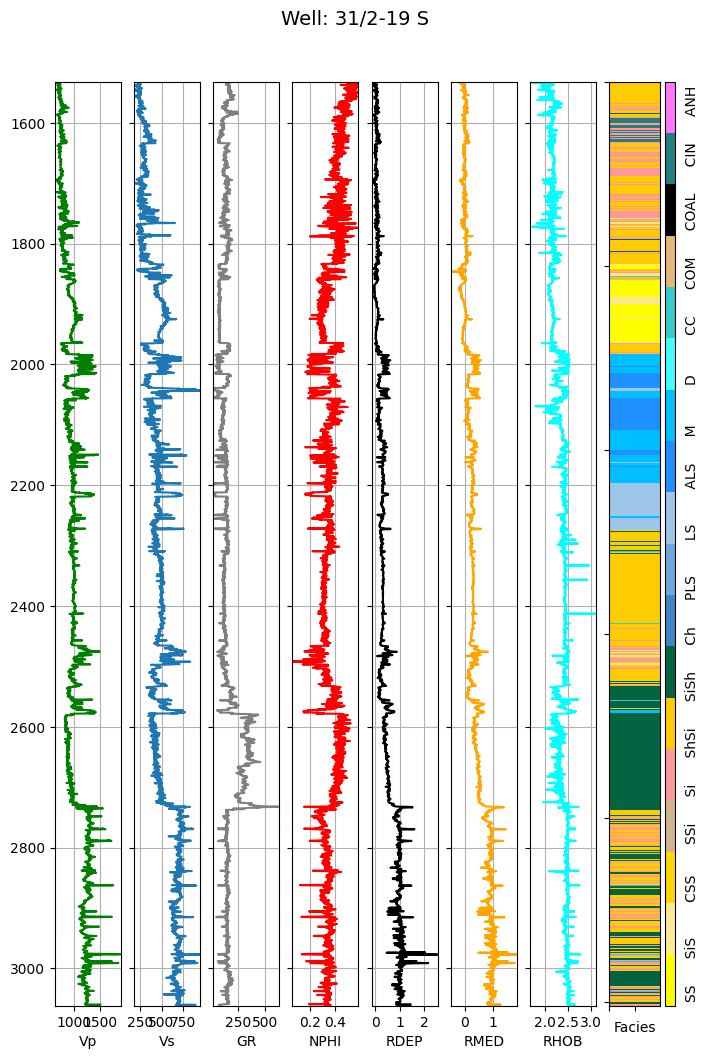

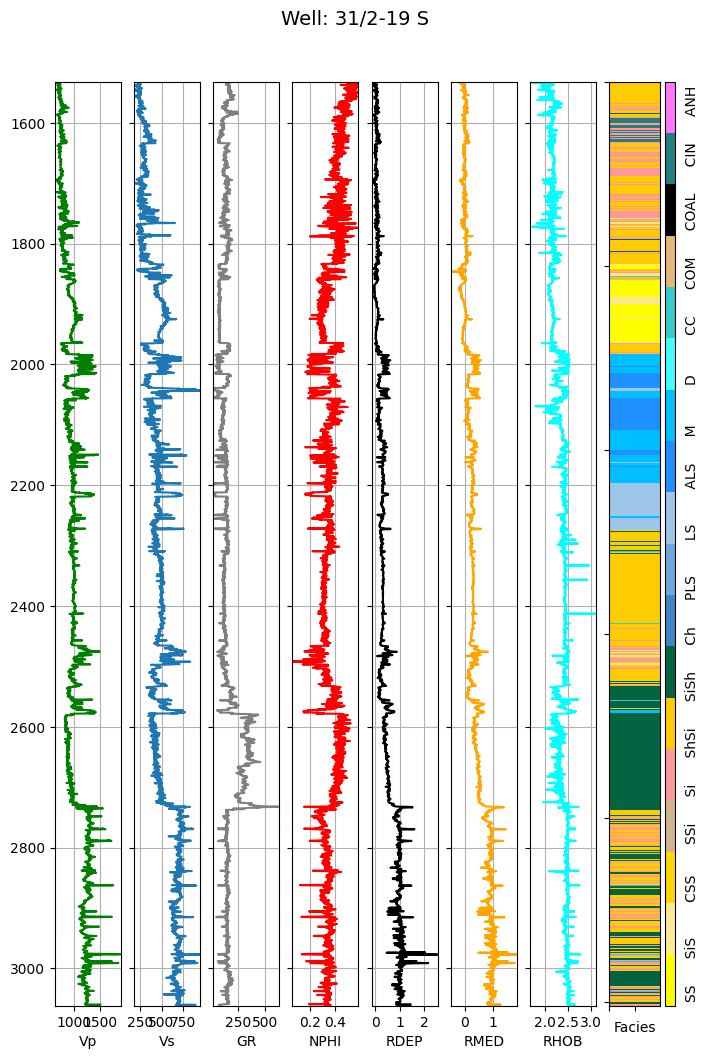

In [65]:
make_facies_log_plot(
    training_data[training_data['WELL'] == '31/2-19 S'],
    facies_colors)

make_facies_log_plot(
    training_data[training_data['WELL'] == '31/2-19 S'],
    facies_colors)

SS       8282
SiS     12448
CSS      3985
SSi      6174
Si      32372
ShSi    37040
SiSh    25963
Ch       3145
PLS      1401
LS      10676
ALS      8567
M       26083
D        2673
CC       2963
COM        44
COAL      322
CIN      2052
ANH       288
Name: Facies, dtype: int64

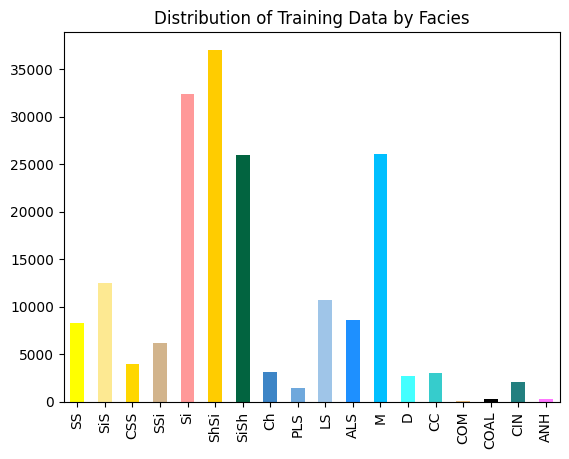

In [66]:
#count the number of unique entries for each facies, sort them by
#facies number (instead of by number of entries)
facies_counts = training_data['Facies'].value_counts().sort_index()
#use facies labels to index each count
facies_counts.index = facies_labels

facies_counts.plot(kind='bar',color=facies_colors, 
                   title='Distribution of Training Data by Facies')
facies_counts

# Conditioning the data set

In [67]:
# correct_labels = training_data[['Vp','Vs']].values
# correct_labels

In [68]:
# correct_labels[0:3]

In [69]:
# df = pd.DataFrame(correct_labels, columns = ['Vp','Vs'])
# df = pd.DataFrame(correct_labels, columns = ['Vp'])

# print(df)

In [70]:
# correct_labels = training_data['Facies'].values
# correct_labels = training_data[['Vp','Vs']].values
correct_labels = training_data['Vp'].values
correct_labels

feature_vectors = training_data.drop(['Vp','Vs','WELL', 'Depth','FaciesLabels','Facies'], axis=1)
feature_vectors.describe()

,GR,NPHI,RDEP,RHOB,RMED
count,184478.000000,184478.000000,184478.000000,184478.000000,184478.000000
mean,84.563754,2.046763,0.438948,2.444904,0.441194
std,42.337080,7.860809,0.455169,0.151253,0.456540
min,0.207500,-0.015100,-0.915044,1.244003,-0.927363
25%,57.835450,0.206200,0.150549,2.359804,0.151370
50%,80.334499,0.281700,0.394047,2.473686,0.403217
75%,105.731672,0.353800,0.674934,2.557400,0.687660
max,1163.366455,61.007858,4.466433,3.217700,4.000000


In [71]:
# Perform Standard scaler for the dataset

from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)

In [72]:
df_scaled_feat = pd.DataFrame(scaled_features,columns=['GR','NPHI','RDEP_log10','RHOB','RMED_log10'])
df_scaled_feat

,GR,NPHI,RDEP_log10,RHOB,RMED_log10
0,0.291623,-0.210559,-1.291284,0.233361,-1.353479
1,0.576630,-0.210623,-1.276200,0.378812,-1.348130
2,0.984200,-0.208499,-1.266348,0.186419,-1.301828
3,1.532130,-0.208511,-1.268311,0.240634,-1.265245
4,1.874290,-0.206183,-1.298705,0.171874,-1.337046
...,...,...,...,...,...
184473,-1.273892,-0.239196,-1.142128,-0.731667,-1.192058
184474,-1.226363,-0.237951,-1.110211,-0.522013,-1.155229
184475,-1.127435,-0.237085,-1.062956,-0.434412,-1.102892
184476,-1.011023,-0.238022,-1.044191,-0.559011,-1.078499


In [73]:
scaled_features

array([[ 0.29162335, -0.21055941, -1.29128427,  0.23336094, -1.35347904],
       [ 0.5766296 , -0.21062302, -1.27620023,  0.3788122 , -1.34813042],
       [ 0.98420002, -0.20849855, -1.2663481 ,  0.1864188 , -1.30182849],
       ...,
       [-1.12743492, -0.23708486, -1.06295636, -0.43441221, -1.10289205],
       [-1.01102317, -0.23802184, -1.04419052, -0.55901063, -1.07849857],
       [-1.11397052, -0.23644993, -1.06148008, -0.7396212 , -1.08905848]])

In [74]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
        scaled_features, correct_labels, test_size=0.2, random_state=123)

In [75]:
x_train

array([[-0.40800172, -0.23082456, -0.30750063,  0.57385062, -0.28910941],
       [-0.04028793, -0.22738922,  1.10057459,  0.72235044,  1.12760836],
       [ 0.37387102, -0.2310028 ,  0.10378823,  0.79389069,  0.19568759],
       ...,
       [-0.83456987, -0.2269191 , -0.55722942, -0.78944323, -0.48989781],
       [-1.741324  , -0.24580102, -0.14241921,  0.89119553, -0.12942432],
       [ 0.11222458, -0.22247934, -1.15113327, -1.45851525, -1.18594168]])

In [76]:
import sklearn.metrics as metrics

def print_evaluate(true, predicted, filename):  
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print(filename)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('___________________')
    
def evaluate(true, predicted):
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return rmse, r2_square

## SVC Prediction

In [77]:
blind_upper = blind[blind['Depth'] < 1230] # The upper part
blind_lower = blind[blind['Depth'] > 1230] # The lower part

In [78]:
upper_count = len(blind_upper.index)
upper_count

172

In [79]:
lower_count = len(blind.index) - len(blind_upper.index)
lower_count

69

In [80]:
def plot_well_1_upper(filename, blind_what, label_1, label_2, x_label, x_lim_low, x_lim_up, x_spacing, y_lim_low, y_lim_up):
    load_data = pd.read_csv(filename, index_col = [0])
    load_data = load_data.to_numpy()
    load_data = load_data[0:upper_count]
    plt.plot(blind_upper[blind_what],blind_upper['Depth'],'b-',label=label_1)
    plt.plot(load_data,blind_upper['Depth'],'-', color='orange',label=label_2)
    plt.legend()
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel("Depth (m)",fontsize=14)
    plt.legend(loc='upper right')
    plt.ylim([y_lim_low, y_lim_up])
    plt.gca().invert_yaxis()
    plt.xlim([x_lim_low, x_lim_up])
    plt.xticks(fontsize=12, rotation=90)
    plt.yticks(fontsize=12)
    plt.xticks(np.arange(x_low, x_up+1, x_spacing))
    fig = plt.gcf()
    fig.set_size_inches(25, 12)

In [81]:
def plot_well_2_upper(filename, blind_what, label_1, label_2, x_label, x_lim_low, x_lim_up, x_spacing, y_lim_low, y_lim_up):
    load_data = pd.read_csv(filename, index_col = [0])
    load_data = load_data.to_numpy()
    load_data = load_data[0:upper_count]
    plt.plot(blind_upper[blind_what],blind_upper['Depth'],'b-',label=label_1)
    plt.plot(load_data,blind_upper['Depth'],'-', color='orange',label=label_2)
    plt.legend()
    plt.grid()
    plt.xlabel(x_label,fontsize=14)
    plt.yticks(color='w')
    #plt.ylabel("Depth")
    plt.legend(loc='upper right')
    plt.ylim([y_lim_low, y_lim_up])
    plt.gca().invert_yaxis()
    plt.xlim([x_lim_low, x_lim_up])
    plt.xticks(fontsize=12, rotation=90)
#     plt.yticks(fontsize=12)
    plt.xticks(np.arange(x_low, x_up+1, x_spacing))
    fig = plt.gcf()
    fig.set_size_inches(25, 12)

In [82]:
def plot_well_1_lower(filename, blind_what, label_1, label_2, x_label, x_lim_low, x_lim_up, x_spacing, y_lim_low, y_lim_up):
    load_data = pd.read_csv(filename, index_col = [0])
    load_data = load_data.to_numpy()
    load_data = load_data[-1*lower_count:]
    plt.plot(blind_lower[blind_what],blind_lower['Depth'],'b-')
    plt.plot(load_data,blind_lower['Depth'],'-', color='orange')
    plt.legend()
    plt.grid()
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel("Depth (m)",fontsize=14)
    plt.legend(loc='upper right')
    plt.ylim([y_lim_low, y_lim_up])
    plt.gca().invert_yaxis()
    plt.xlim([x_lim_low, x_lim_up])
    plt.xticks(fontsize=12, rotation=90)
    plt.yticks(fontsize=12)
    plt.xticks(np.arange(x_low, x_up+1, x_spacing))
    fig = plt.gcf()
    fig.set_size_inches(25, 12)

In [83]:
def plot_well_2_lower(filename, blind_what, label_1, label_2, x_label, x_lim_low, x_lim_up, x_spacing, y_lim_low, y_lim_up):
    load_data = pd.read_csv(filename, index_col = [0])
    load_data = load_data.to_numpy()
    load_data = load_data[-1*lower_count:]
    plt.plot(blind_lower[blind_what],blind_lower['Depth'],'b-')
    plt.plot(load_data,blind_lower['Depth'],'-', color='orange')
    plt.legend()
#     plt.grid()
    plt.xlabel(x_label,fontsize=14)
    plt.yticks(color='w')
    #plt.ylabel("Depth")
    plt.legend(loc='upper right')
    plt.ylim([y_lim_low, y_lim_up])
    plt.gca().invert_yaxis()
    plt.xlim([x_lim_low, x_lim_up])
    plt.xticks(fontsize=12, rotation=90)
#     plt.yticks(fontsize=12)
    plt.xticks(np.arange(x_low, x_up+1, x_spacing))
    fig = plt.gcf()
    fig.set_size_inches(25, 12)

In [84]:
def plot_well_1(filename, blind_what, label_1, label_2, x_label, x_lim_low, x_lim_up, x_spacing):
    load_data = pd.read_csv(filename, index_col = [0])
    load_data = load_data.to_numpy()
    plt.plot(blind[blind_what],blind['Depth'],label=label_1)
    plt.plot(load_data,blind['Depth'],label=label_2)
    plt.legend()
    plt.gca().invert_yaxis()
    plt.grid()
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel("Depth (m)",fontsize=14)
    plt.legend(loc='upper right')
    plt.xlim([x_lim_low, x_lim_up])
    plt.xticks(fontsize=12, rotation=90)
    plt.yticks(fontsize=12)
    plt.xticks(np.arange(x_low, x_up+1, x_spacing))
    fig = plt.gcf()
    fig.set_size_inches(25, 12)
    
    print_evaluate(blind[blind_what], load_data, filename)

In [85]:
def plot_well_2(filename, blind_what, label_1, label_2, x_label, x_lim_low, x_lim_up, x_spacing):
    load_data = pd.read_csv(filename, index_col = [0])
    load_data = load_data.to_numpy()
    plt.plot(blind[blind_what],blind['Depth'],label=label_1)
    plt.plot(load_data,blind['Depth'],label=label_2)
    plt.legend()
    plt.gca().invert_yaxis()
    plt.grid()
    plt.xlabel(x_label,fontsize=14)
    plt.yticks(color='w')
    #plt.ylabel("Depth")
    plt.legend(loc='upper right')
    plt.xlim([x_lim_low, x_lim_up])
    plt.xticks(fontsize=12, rotation=90)
#     plt.yticks(fontsize=12)
    plt.xticks(np.arange(x_low, x_up+1, x_spacing))
    fig = plt.gcf()
    fig.set_size_inches(25, 12)
    
    print_evaluate(blind[blind_what], load_data, filename)

In [86]:
# filename  = 'well_15_Vp_pred_SVM.csv'
# load_data = pd.read_csv(filename, index_col = [0])
# load_data = load_data.to_numpy()
# load_data

In [87]:
# x = 9
# font_size = 14

# Velo      = 'Vp'
# Meas      = 'Measured Vp'
# Pred      = 'Predicted Vp'
# x_lbl     = 'Vp (km/s)'
# x_low     = 900
# x_up      = 1400
# x_spacing = 100

# fig, ax = plt.subplots(1, x)
# plt.subplot(1, x, 1)
# plot_well_1('well_32_Vp_pred_SVM.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing)
# ax[0].set_title("SVM", fontsize=font_size)

# plt.subplot(1, x, 2)
# plot_well_2('well_32_Vp_pred_RF.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing)
# ax[1].set_title("RF", fontsize=font_size)

# plt.subplot(1, x, 3)
# plot_well_2('well_32_Vp_pred_XGB.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing)
# ax[2].set_title("XGB", fontsize=font_size)

# plt.subplot(1, x, 4)
# plot_well_2('well_32_Vp_pred_FF1.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing)
# ax[3].set_title("FF#1\nTrial: 10\nEpoch:10\nScaler: MinMax", fontsize=font_size)

# plt.subplot(1, x, 5)
# plot_well_2('well_32_Vp_pred_FF2_T100_E3.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing)
# ax[4].set_title("FF#2\nTrial: 100\nEpoch:100\nScaler: MinMax", fontsize=font_size)

# plt.subplot(1, x, 6)
# plot_well_2('well_32_Vp_pred_FF3.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing)
# ax[5].set_title("FF#3\nTrial: 10\nEpoch:10\nScaler: Standard", fontsize=font_size)

# plt.subplot(1, x, 7)
# plot_well_2('well_32_Vp_pred_FF4_T100_E3.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing)
# ax[6].set_title("FF#4\nTrial: 100\nEpoch:100\nScaler: Standard", fontsize=font_size)

# plt.subplot(1, x, 8)
# plot_well_2('well_32_Vp_pred_CNN1_T100_E1.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing)
# ax[7].set_title("CNN#1\nTrial: 100\nEpoch:1\nScaler: MinMax", fontsize=font_size)

# plt.subplot(1, x, 9)
# plot_well_2('well_32_Vp_pred_CNN1_T100_E1.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing)
# ax[8].set_title("CNN#2\nTrial: 100\nEpoch:1\nScaler: Standard", fontsize=font_size)

# fig.suptitle('Well: 32/2-1', fontsize=20, y=0.99)

# fig.savefig('well32_Vp.png', format='png', dpi=600)

well_32_Vs_pred_SVM.csv
RMSE: 72.15692720604424
R2 Square -3.6059324347793487
___________________
well_32_Vs_pred_RF.csv
RMSE: 93.95589973211013
R2 Square -6.809255162323687
___________________
well_32_Vs_pred_XGB.csv
RMSE: 84.22839503018996
R2 Square -5.275936668999894
___________________
well_32_Vs_pred_FF1.csv
RMSE: 76.22641831601558
R2 Square -4.14011137799215
___________________
well_32_Vs_pred_FF2_T100_E3.csv
RMSE: 34.67868964654053
R2 Square -0.06386582954220721
___________________
well_32_Vs_pred_FF3.csv
RMSE: 77.8540977404173
R2 Square -4.361970913682027
___________________
well_32_Vs_pred_FF4_T100_E3.csv
RMSE: 56.70974240045502
R2 Square -1.8449644958124787
___________________
well_32_Vs_pred_CNN1_T100_E1.csv
RMSE: 49.25940947292129
R2 Square -1.1465445390466757
___________________
well_32_Vs_pred_CNN2_T100_E1.csv
RMSE: 69.51902630890122
R2 Square -3.275322331204152
___________________


Text(0.5, 0.99, '(C) Well: 32/2-1')

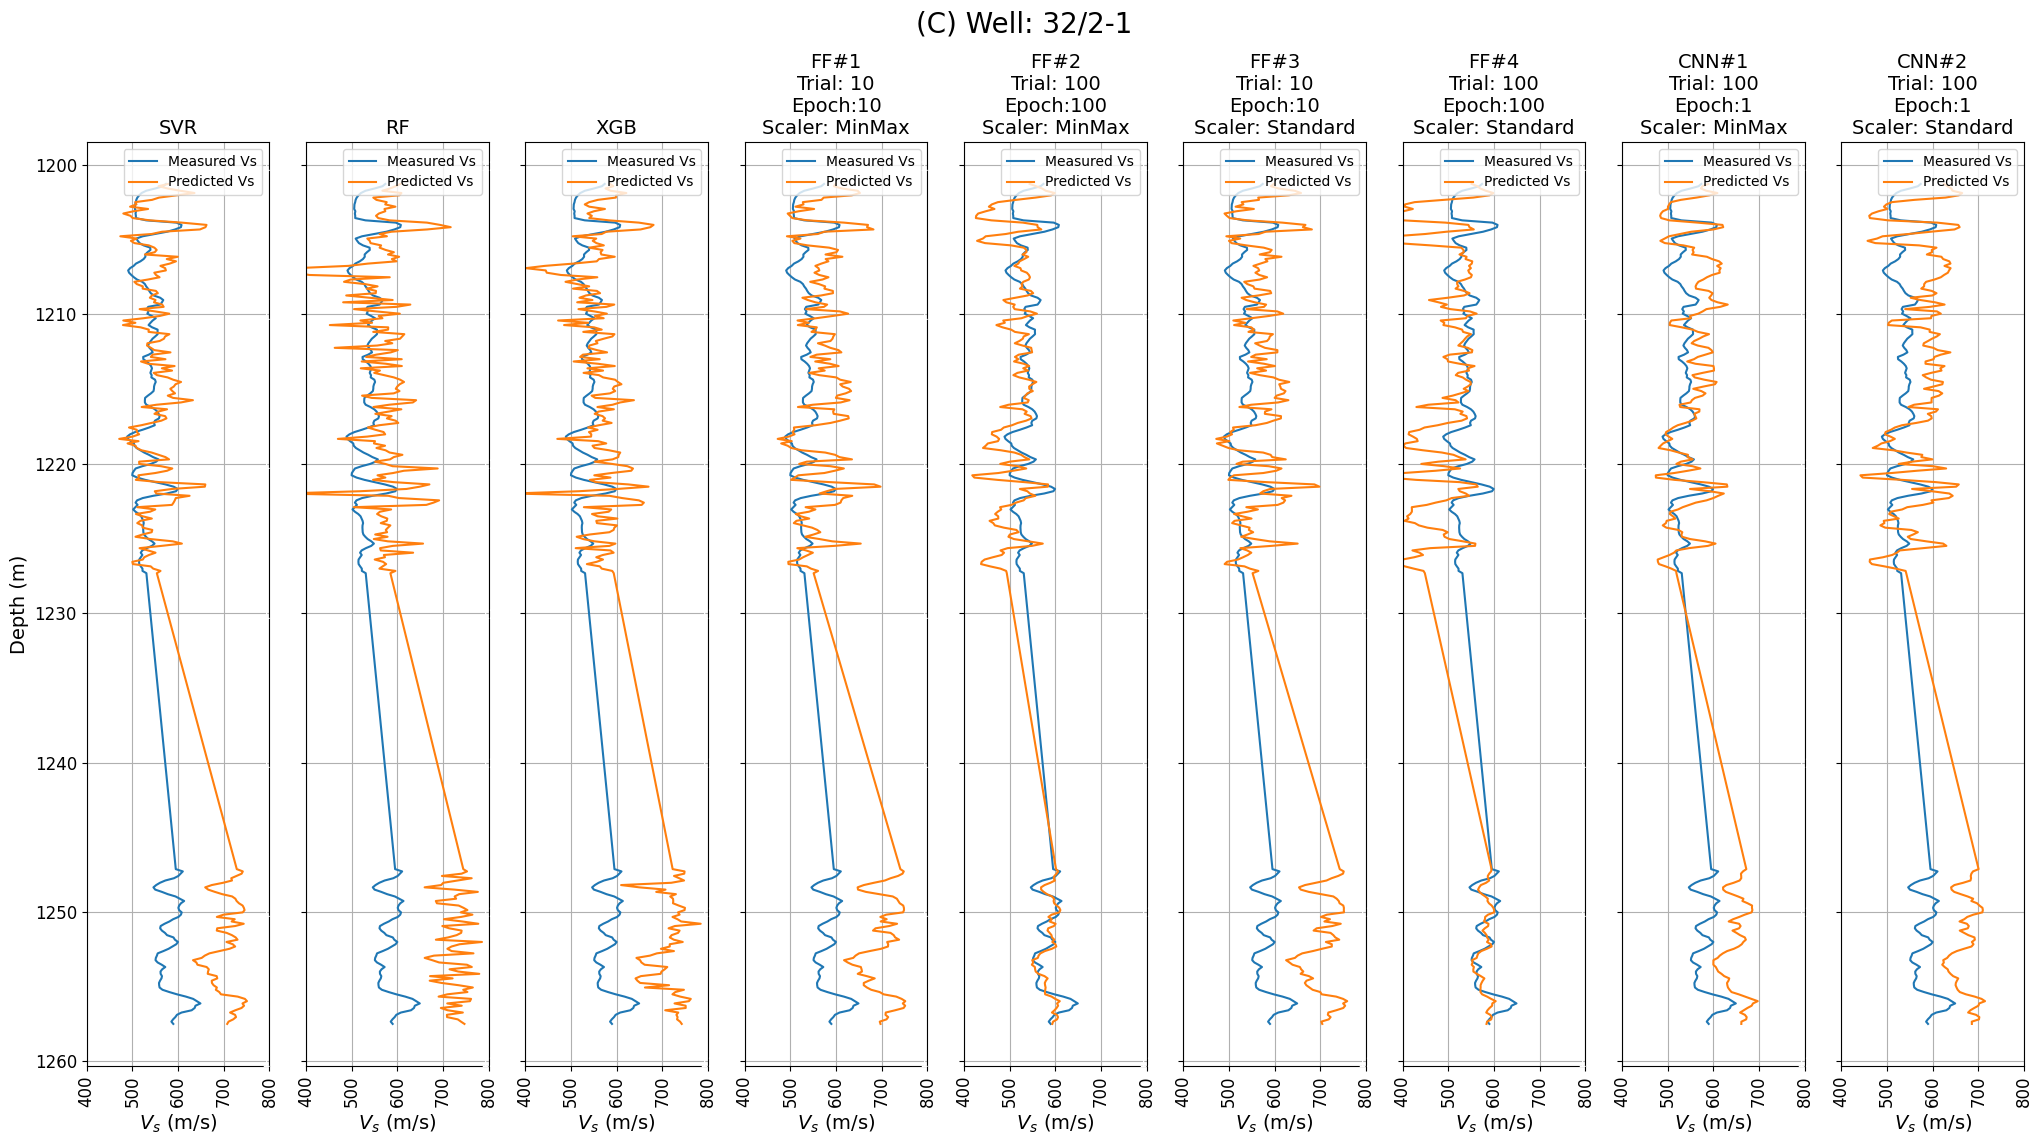

In [88]:
x = 9
font_size = 14

Velo      = 'Vs'
Meas      = 'Measured Vs'
Pred      = 'Predicted Vs'
x_lbl     = '$V_s$ (m/s)'
x_low     = 400
x_up      = 800
x_spacing = 100

fig, ax = plt.subplots(1, x)
plt.subplot(1, x, 1)
plot_well_1('well_32_Vs_pred_SVM.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing)
ax[0].set_title("SVR", fontsize=font_size)

plt.subplot(1, x, 2)
plot_well_2('well_32_Vs_pred_RF.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing)
ax[1].set_title("RF", fontsize=font_size)

plt.subplot(1, x, 3)
plot_well_2('well_32_Vs_pred_XGB.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing)
ax[2].set_title("XGB", fontsize=font_size)

plt.subplot(1, x, 4)
plot_well_2('well_32_Vs_pred_FF1.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing)
ax[3].set_title("FF#1\nTrial: 10\nEpoch:10\nScaler: MinMax", fontsize=font_size)

plt.subplot(1, x, 5)
plot_well_2('well_32_Vs_pred_FF2_T100_E3.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing)
ax[4].set_title("FF#2\nTrial: 100\nEpoch:100\nScaler: MinMax", fontsize=font_size)

plt.subplot(1, x, 6)
plot_well_2('well_32_Vs_pred_FF3.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing)
ax[5].set_title("FF#3\nTrial: 10\nEpoch:10\nScaler: Standard", fontsize=font_size)

plt.subplot(1, x, 7)
plot_well_2('well_32_Vs_pred_FF4_T100_E3.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing)
ax[6].set_title("FF#4\nTrial: 100\nEpoch:100\nScaler: Standard", fontsize=font_size)

plt.subplot(1, x, 8)
plot_well_2('well_32_Vs_pred_CNN1_T100_E1.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing)
ax[7].set_title("CNN#1\nTrial: 100\nEpoch:1\nScaler: MinMax", fontsize=font_size)

plt.subplot(1, x, 9)
plot_well_2('well_32_Vs_pred_CNN2_T100_E1.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing)
ax[8].set_title("CNN#2\nTrial: 100\nEpoch:1\nScaler: Standard", fontsize=font_size)

fig.suptitle('(C) Well: 32/2-1', fontsize=20, y=0.99)

# fig.savefig('well32_Vs.png', format='png', dpi=600)

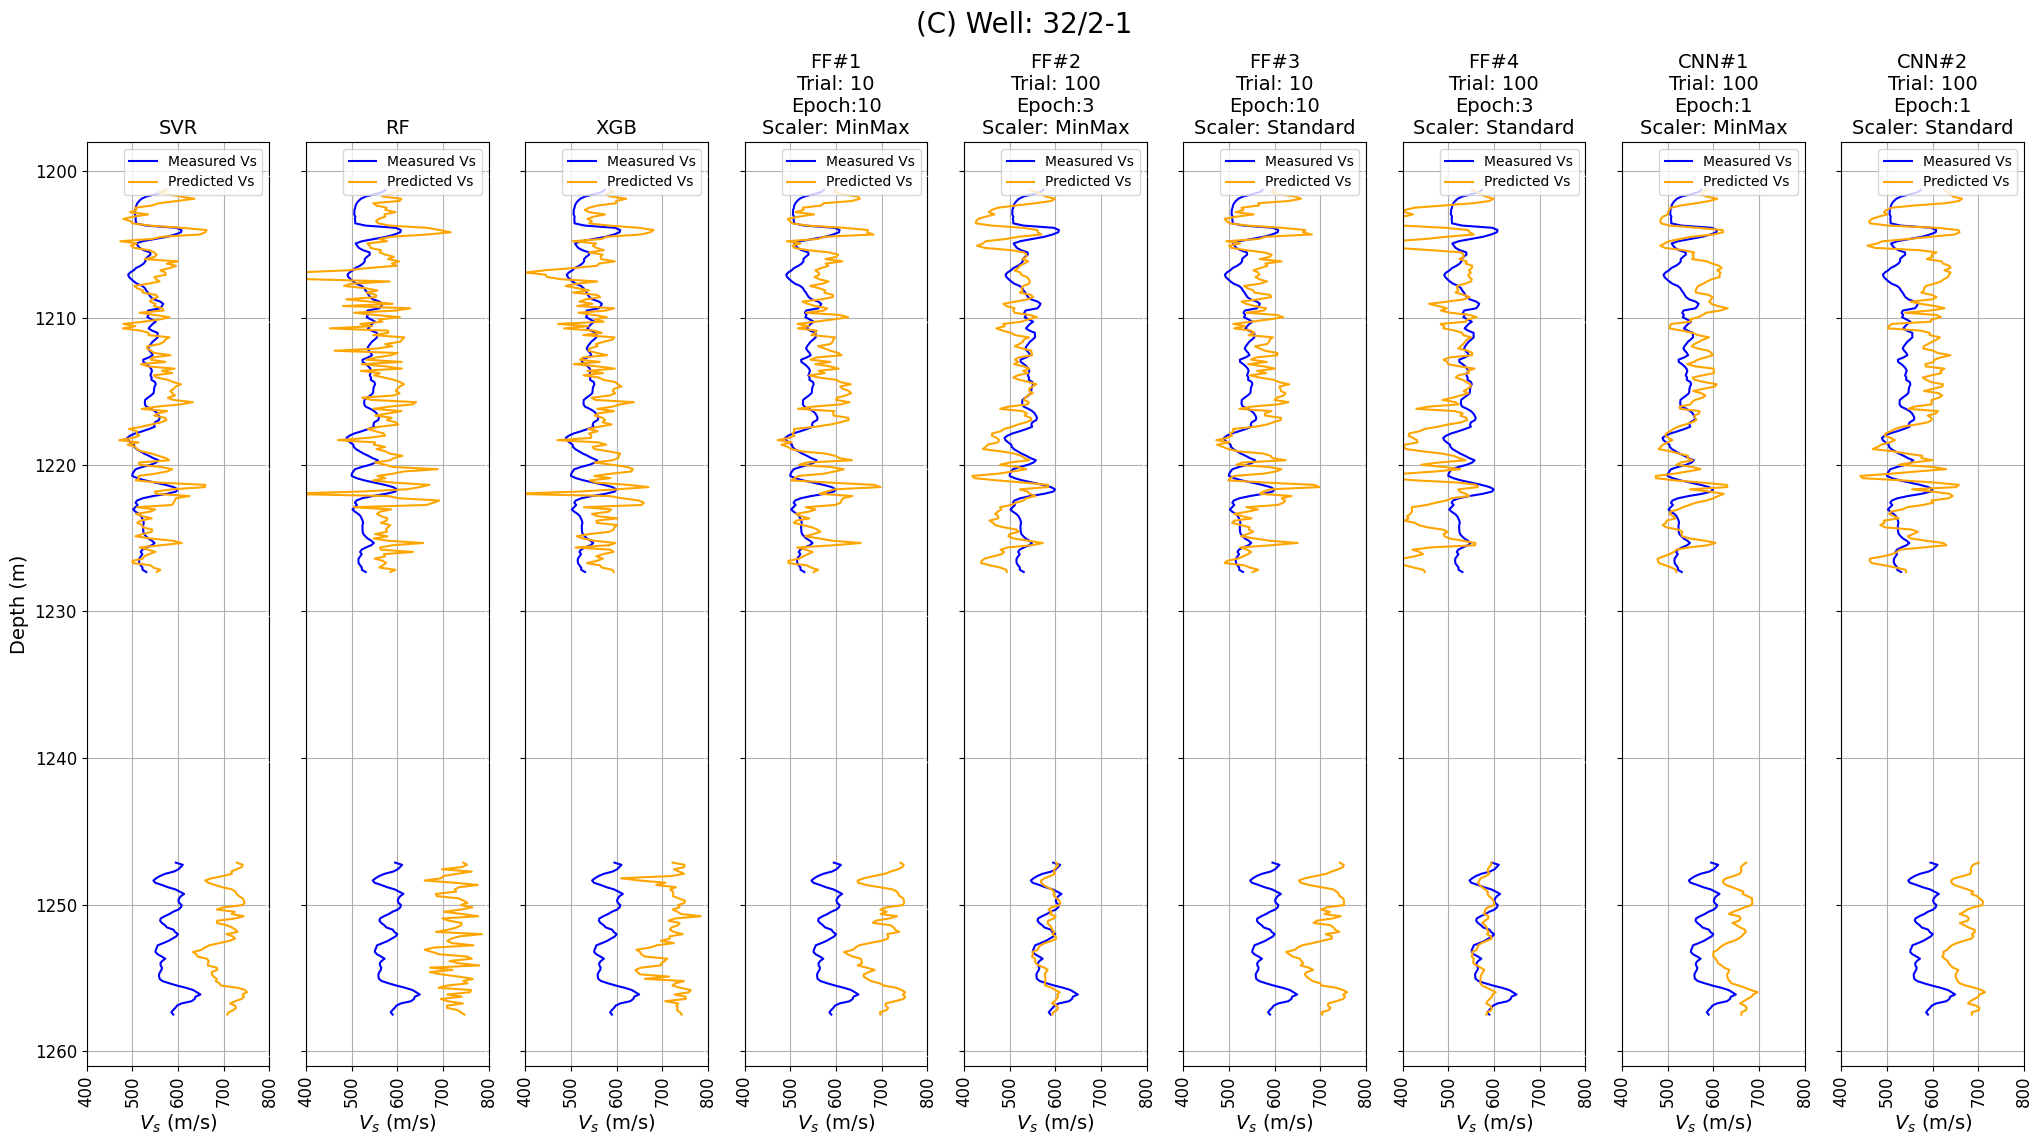

In [89]:
x = 9
font_size = 14

Velo      = 'Vs'
Meas      = 'Measured Vs'
Pred      = 'Predicted Vs'
x_lbl     = '$V_s$ (m/s)'
x_low     = 400
x_up      = 800
x_spacing = 100

y_low     = 1198
y_up      = 1261

fig, ax = plt.subplots(1, x)
plt.subplot(1, x, 1)
plot_well_1_upper('well_32_Vs_pred_SVM.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing, y_low, y_up)
plot_well_1_lower('well_32_Vs_pred_SVM.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing, y_low, y_up)
ax[0].set_title("SVR", fontsize=font_size)

plt.subplot(1, x, 2)
plot_well_2_upper('well_32_Vs_pred_RF.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing, y_low, y_up)
plot_well_2_lower('well_32_Vs_pred_RF.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing, y_low, y_up)
ax[1].set_title("RF", fontsize=font_size)

plt.subplot(1, x, 3)
plot_well_2_upper('well_32_Vs_pred_XGB.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing, y_low, y_up)
plot_well_2_lower('well_32_Vs_pred_XGB.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing, y_low, y_up)
ax[2].set_title("XGB", fontsize=font_size)

plt.subplot(1, x, 4)
plot_well_2_upper('well_32_Vs_pred_FF1.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing, y_low, y_up)
plot_well_2_lower('well_32_Vs_pred_FF1.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing, y_low, y_up)
ax[3].set_title("FF#1\nTrial: 10\nEpoch:10\nScaler: MinMax", fontsize=font_size)

plt.subplot(1, x, 5)
plot_well_2_upper('well_32_Vs_pred_FF2_T100_E3.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing, y_low, y_up)
plot_well_2_lower('well_32_Vs_pred_FF2_T100_E3.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing, y_low, y_up)
ax[4].set_title("FF#2\nTrial: 100\nEpoch:3\nScaler: MinMax", fontsize=font_size)

plt.subplot(1, x, 6)
plot_well_2_upper('well_32_Vs_pred_FF3.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing, y_low, y_up)
plot_well_2_lower('well_32_Vs_pred_FF3.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing, y_low, y_up)
ax[5].set_title("FF#3\nTrial: 10\nEpoch:10\nScaler: Standard", fontsize=font_size)

plt.subplot(1, x, 7)
plot_well_2_upper('well_32_Vs_pred_FF4_T100_E3.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing, y_low, y_up)
plot_well_2_lower('well_32_Vs_pred_FF4_T100_E3.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing, y_low, y_up)
ax[6].set_title("FF#4\nTrial: 100\nEpoch:3\nScaler: Standard", fontsize=font_size)

plt.subplot(1, x, 8)
plot_well_2_upper('well_32_Vs_pred_CNN1_T100_E1.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing, y_low, y_up)
plot_well_2_lower('well_32_Vs_pred_CNN1_T100_E1.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing, y_low, y_up)
ax[7].set_title("CNN#1\nTrial: 100\nEpoch:1\nScaler: MinMax", fontsize=font_size)

plt.subplot(1, x, 9)
plot_well_2_upper('well_32_Vs_pred_CNN2_T100_E1.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing, y_low, y_up)
plot_well_2_lower('well_32_Vs_pred_CNN2_T100_E1.csv', Velo, Meas, Pred, x_lbl, x_low, x_up, x_spacing, y_low, y_up)
ax[8].set_title("CNN#2\nTrial: 100\nEpoch:1\nScaler: Standard", fontsize=font_size)

fig.suptitle('(C) Well: 32/2-1', fontsize=20, y=0.99)

fig.savefig('well32_Vs.png', format='png', dpi=300)

In [90]:
# blind[blind['Depth'] < 1230] # The upper part
# blind[blind['Depth'] > 1230] # The lower part